## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the houseprices data from Thinkful's database.
- Reimplement the model you built in the previous checkpoint.
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
- be sure to close the database connection after initially pulling in your data.

In [1]:
import math
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

#create connection to database based on credentials 
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# create a dataframe from the imported data
house_price_data = pd.read_sql_query('select * from houseprices',con=engine)

#dispose of the connection 
engine.dispose()

In [3]:
from sklearn import linear_model

# Y is the target variable
Y = house_price_data['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house_price_data[['lotarea','grlivarea']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  0.66179816 103.82284134]

Intercept: 
 16621.431236346747


### Check the Error Term AKA mean of ERRORS 

In [4]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather temperature model is: {}".format(np.mean(errors)))
    
    
    

Mean of the errors in the weather temperature model is: 1.3505373379751428e-11


mean of errors is realativly small 1.35 e -11 

### Check the Homoscedasticity 

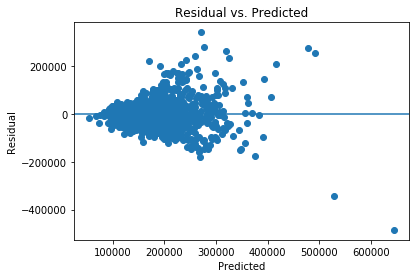

In [5]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [6]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 0.429922 and p value is 0.512
Levene test statistic value is 12.3821 and p value is 0.00044


from the visual and the bartlett test we can see that we cannot reject the null hypothesis that our model is homoscedastic I would guess that this is from the lot area which shows a high number of outliers and a spreading of values as it increases. 

## test for correliniearity

In [12]:
house_price_data[['lotarea','grlivarea','saleprice']].corr()

,lotarea,grlivarea,saleprice
lotarea,1.000000,0.263116,0.263843
grlivarea,0.263116,1.000000,0.708624
saleprice,0.263843,0.708624,1.000000


Correliniarity looks good the variables are quite uncoorelated 

## checking for correlation of error terms

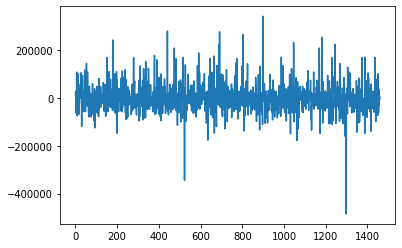

In [7]:
plt.plot(errors)
plt.show()

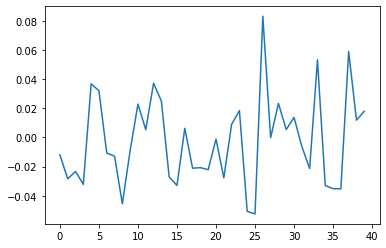

In [8]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [ ]:
Errors appear to be uncoorelated 

## Check for normal distribution of errors 

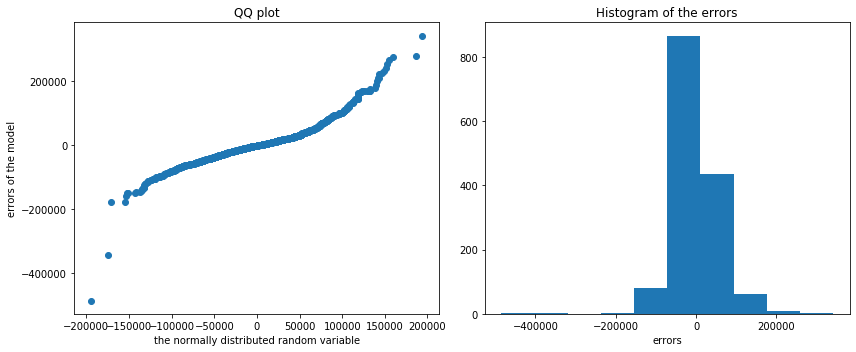

In [14]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [11]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 4299.015831179315 and p value is 0.0
Normality test statistics is 268.2719261064008 and p value is 5.565336407298756e-59


Errors are not normally distributed however they are not far off 